# UT3 - GRÁFICOS CON GGPLOT2   

## Motores gráficos en R
Un motor gráfico es un conjunto de funciones que permiten realizar manipulaciones gráficas básicas: generar lienzos (o canvas), trazar líneas, dibujar puntos, etc.    
Un usuario de R no manipula generalmente esas funciones directamente: utiliza funciones de alto nivel, como `plot`. La función `plot` es la encargada de invocar esas funciones de bajo nivel que pintan los segmentos, círculos, etc. que conforman un gráfico estadístico, con sus ejes, sus etiquetas, etc.

Existen dos *motores gráficos* en R. 

Funciones de R tales como `plot`, `hist`, `barplot`, `boxplot` y otras se apoyan en el motor tradicional de R, que es suficiente para esos fines. Sin embargo, se queda corto para construir otro tipo de gráficos más avanzados. Por eso, en 2001, Paul Murrell desarrolló un motor gráfico alternativo, **grid**. Uno de sus objetivos era facilitar la generación en R de un tipo de gráficos conocidos como de *Trellis*, de celosía o de pequeños múltiplos.

<img src="/home/jordi/Documentos/Ribera/Curso_25_26/CEIABD/CEIABD_25_26/PROGRAMACION_IA_R/programacion_R/NOTEBOOKS DEL AULA/img/trellis.png" width="700">


Los gráficos de Trellis permiten seguir el comportamiento de unas variables de interés a través de los distintos niveles de otras, disponiendo la información en una retícula que facilita el descubrimiento de patrones por inspección visual.    
El gráfico anterior muestra la relación entre el *peso* y el *consumo de gasolina* de una serie de vehículos en función de su número de cilindros y el número de marchas. La relación es más evidente usando un gráfico de Trellis que, por ejemplo, usando colores (o formas) para representar el número de cilindros o marchas en un único gráfico de dispersión.

Hay muchas funciones y paquetes que crean gráficos apoyándose en el motor gráfico tradicional. Otros, utilizan `grid`. Dos de los más conocidos son `lattice` (con el que está generado el gráfico anterior) y `ggplot2`. De hecho, `lattice` y `ggplot2` se solapan funcionalmente y la mayoría de los usuarios de R se decantan por uno u otro y lo usan predominantemente.   

## Una primera toma de contacto   

En primer lugar vamos a cargar los paquetes `ggplot2` y `reshape2`:

In [7]:
install.packages("rjson", repos="http://cran.rstudio.com/")

Installing package into ‘/home/jordi/R/x86_64-pc-linux-gnu-library/4.5’
(as ‘lib’ is unspecified)


probando la URL 'http://cran.rstudio.com/src/contrib/rjson_0.2.23.tar.gz'
Content type 'application/x-gzip' length 79159 bytes (77 KB)
downloaded 77 KB

* installing *source* package ‘rjson’ ...
** this is package ‘rjson’ version ‘0.2.23’
** package ‘rjson’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
using C compiler: ‘gcc (Ubuntu 13.3.0-6ubuntu2~24.04) 13.3.0’
using C++ compiler: ‘g++ (Ubuntu 13.3.0-6ubuntu2~24.04) 13.3.0’


g++ -std=gnu++17 -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -fno-omit-frame-pointer -mno-omit-leaf-frame-pointer -ffile-prefix-map=/build/r-base-ePVXIN/r-base-4.5.2=. -fstack-protector-strong -fstack-clash-protection -Wformat -Werror=format-security -fcf-protection -fdebug-prefix-map=/build/r-base-ePVXIN/r-base-4.5.2=/usr/src/r-base-4.5.2-1.2404.0 -Wdate-time -D_FORTIFY_SOURCE=3   -c dump.cpp -o dump.o
gcc -std=gnu2x -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -fno-omit-frame-pointer -mno-omit-leaf-frame-pointer -ffile-prefix-map=/build/r-base-ePVXIN/r-base-4.5.2=. -fstack-protector-strong -fstack-clash-protection -Wformat -Werror=format-security -fcf-protection -fdebug-prefix-map=/build/r-base-ePVXIN/r-base-4.5.2=/usr/src/r-base-4.5.2-1.2404.0 -Wdate-time -D_FORTIFY_SOURCE=3  -c parser.c -o parser.o
gcc -std=gnu2x -I"/usr/share/R/include" -DNDEBUG       -fpic  -g -O2 -fno-omit-frame-pointer -mno-omit-leaf-frame-pointer -ffile-prefix-map=/build/r-base-ePVXIN/r-base

installing to /home/jordi/R/x86_64-pc-linux-gnu-library/4.5/00LOCK-rjson/00new/rjson/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (rjson)

The downloaded source packages are in
	‘/tmp/Rtmpt2HA1D/downloaded_packages’


In [2]:
library(ggplot2)
library(reshape2)
library(rjson)

___
## Obtención de datos desde el INE

 El INE proporciona un API JSON del que se puede bajar información de interés estadístico. Tiene, además, un servicio que permite construir la consulta, i.e., obtener la URL con la que consultar una serie de datos en concreto. Usándola, encontramos que para obtener la población de cada provincia española por sexos durante los últimos cinco años tenemos que consultar esta.

Pero podemos realizar la consulta programáticamente así:

In [2]:
# Leer datos de población desde el INE
pob <- readLines("http://servicios.ine.es/wstempus/js/ES/DATOS_TABLA/2852?nult=5&tip=AM")
pob <- paste(pob, collapse = " ")
pob <- fromJSON(pob)

En la primera línea cargamos el paquete necesario, `rjson`.    

En las dos siguientes leemos la URL y colapsamos todas las líneas en una única cadena de texto, una exigencia de `fromJSON`. Esta es la función que se llama en última instancia para convertir el fichero JSON en una estructura arborescente en R, i.e., una lista que contiene, a su vez, otras listas.

In [3]:
class(pob)

[1] "list"

In [11]:
length(pob)

[1] 159

`pob` tiene longitud 159. Son tres elementos por cada provincia (más Ceuta, Melilla y el total nacional), los correspondientes a los dos sexos y el total.     
Cada uno de estos elementos tiene una serie de atributos y una sublista de longitud 5, que almacena los datos anuales:

In [4]:
pob[[89]]$Data[[5]]$Valor # Población correspondiente al quinto periodo (o año) del elemento 85 de la primera lista.

[1] 161775

In [5]:
pob[[89]]$Nombre # Nombre del elemento 85 de la lista.

[1] "Lugo. Hombres. Total habitantes. Personas. "


Para el primer gráfico con `ggplot2` vamos a leer y preprocesar los datos del paro del INE:

In [6]:
paro <- read.table("datasets/paro.csv", header = T, sep = "\t")
head(paro)

   Gender           Provinces Periodo Situation value
1   Males         02 Albacete  2014Q4    active 103.9
2 Females         02 Albacete  2014Q4    active  83.5
3   Males 03 Alicante/Alacant  2014Q4    active 490.5
4 Females 03 Alicante/Alacant  2014Q4    active 398.7
5   Males          04 Almería  2014Q4    active 198.5
6 Females          04 Almería  2014Q4    active 155.8

In [7]:
paro <- dcast(paro, Gender + Provinces + Periodo ~ Situation) # Convertir de formato largo a formato ancho
head(paro)

   Gender      Provinces Periodo active employed inactive never_employed
1 Females 01 Araba/Álava  2011Q1   73.2     65.3     62.3            0.8
2 Females 01 Araba/Álava  2011Q2   70.6     64.0     64.9            0.1
3 Females 01 Araba/Álava  2011Q3   70.3     62.6     65.3            0.3
4 Females 01 Araba/Álava  2011Q4   72.0     62.7     63.7            1.7
5 Females 01 Araba/Álava  2012Q1   69.5     58.2     66.1            0.7
6 Females 01 Araba/Álava  2012Q2   71.9     61.3     63.6            0.9
  unemployed
1        7.9
2        6.6
3        7.7
4        9.3
5       11.3
6       10.6

La operación anterior es un *pivot* a **formato ancho** (wide format):

- La fórmula `Gender + Provinces + Periodo ~ Situation` significa:

    - A la izquierda (`Gender + Provinces + Periodo`): las variables que identifican cada registro (las “claves” o ID variables).

    - A la derecha (`Situation`): la variable cuyos niveles/categorías se convertirán en columnas.

En el dataframe `paro`, la columna`Situation` puede tomar los valores:

    `active`, `employed`, `unemployed`, `never_employed`, `inactive`

Después de ejecutar `dcast`, en lugar de existir una columna `Situation` y otra `value`, se obtiene una fila por (`Gender`, `Provinces`, `Periodo`) y varias columnas:

    `active`, `employed`, `unemployed`, `never_employed`, `inactive`   

y en cada una aparecerá el número correspondiente.

🔎 Nota importante:

`dcast()` necesita saber “qué columna contiene los valores numéricos”.

In [8]:
paro$tasa.paro <- 100 * paro$unemployed / paro$active # Calcular tasa de paro
head(paro)

   Gender      Provinces Periodo active employed inactive never_employed
1 Females 01 Araba/Álava  2011Q1   73.2     65.3     62.3            0.8
2 Females 01 Araba/Álava  2011Q2   70.6     64.0     64.9            0.1
3 Females 01 Araba/Álava  2011Q3   70.3     62.6     65.3            0.3
4 Females 01 Araba/Álava  2011Q4   72.0     62.7     63.7            1.7
5 Females 01 Araba/Álava  2012Q1   69.5     58.2     66.1            0.7
6 Females 01 Araba/Álava  2012Q2   71.9     61.3     63.6            0.9
  unemployed tasa.paro
1        7.9 10.792350
2        6.6  9.348442
3        7.7 10.953058
4        9.3 12.916667
5       11.3 16.258993
6       10.6 14.742698

In [9]:
paro$Periodo <- as.character(paro$Periodo) # Convertir a carácter para poder manipular
paro$Periodo <- gsub("Q1", "-03-31", paro$Periodo) # Reemplazar los trimestres por fechas concretas
paro$Periodo <- gsub("Q2", "-06-30", paro$Periodo)
paro$Periodo <- gsub("Q3", "-09-30", paro$Periodo)
paro$Periodo <- gsub("Q4", "-12-31", paro$Periodo)
paro$Periodo <- as.Date(paro$Periodo) # Convertir a tipo fecha
head(paro)

   Gender      Provinces    Periodo active employed inactive never_employed
1 Females 01 Araba/Álava 2011-03-31   73.2     65.3     62.3            0.8
2 Females 01 Araba/Álava 2011-06-30   70.6     64.0     64.9            0.1
3 Females 01 Araba/Álava 2011-09-30   70.3     62.6     65.3            0.3
4 Females 01 Araba/Álava 2011-12-31   72.0     62.7     63.7            1.7
5 Females 01 Araba/Álava 2012-03-31   69.5     58.2     66.1            0.7
6 Females 01 Araba/Álava 2012-06-30   71.9     61.3     63.6            0.9
  unemployed tasa.paro
1        7.9 10.792350
2        6.6  9.348442
3        7.7 10.953058
4        9.3 12.916667
5       11.3 16.258993
6       10.6 14.742698

La expresión fundamental para crear un gráfico con `ggplot2`` es:

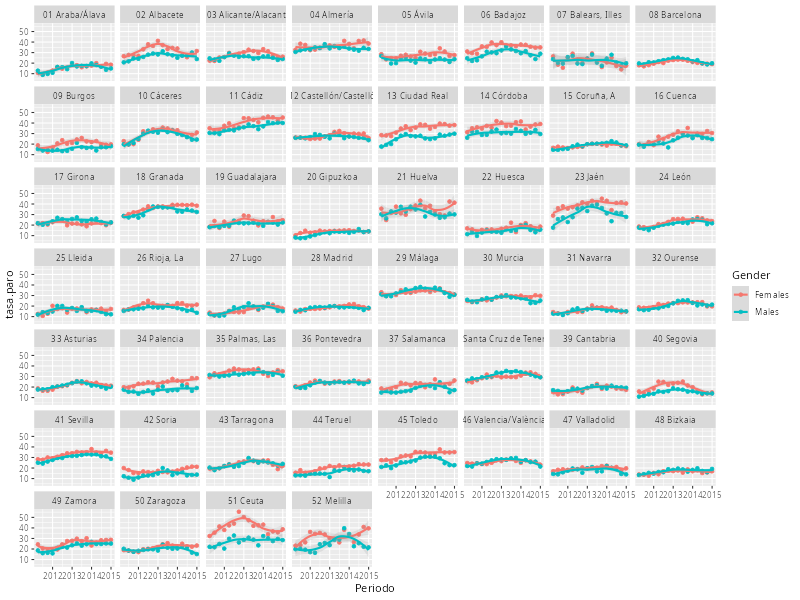

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'

In [10]:
ggplot(paro, aes(x = Periodo, y = tasa.paro, col = Gender)) +
  geom_point() + geom_smooth(alpha = 0.2) +
  facet_wrap(~ Provinces)

La expresión anterior combina varios elementos que discutiremos con detalle más adelante:

- **Datos**: siempre una tabla.
- **Estéticas**, que asocian a elementos representables gráficamente (la posición x e y, el color, etc.) columnas de la tabla de datos.
- **Geometrías** (o capas): puntos, rectas, histogramas, densidades, etc. También se llaman capas porque pueden superponerse.
- **Facetas**: parten un gráfico en sublienzos preservando las escalas (pequeños múltiplos)

## Elementos de un gráfico en `ggplot2`   

Un gráfico en ggplot2 se construye combinando una serie de elementos básicos y comunes a muchos tipos de gráficos distintos mediante una sintaxis sencilla. Esta sección describe esa sintaxis y los elementos que articula.

### Datos   
Uno de los elementos más importantes de un gráfico son los datos que se quieren representar. Una particularidad de ggplot2 es que solo acepta un tipo de datos: data.frames. Otras funciones gráficas (p.e., hist) admiten vectores, listas u otro tipo de estructuras. ggplot2 no.
```R
p <- ggplot(iris)
```
El código anterior crea un objeto, p que viene a ser un *protográfico*:    
contiene los datos que vamos a utilizar, los del conjunto de datos iris. Obviamente, el código anterior es insuficiente para crear un gráfico: aún no hemos indicado qué queremos hacer con iris.

### Estéticas
En un conjunto de datos hay columnas: edad, altura, ingresos, temperatura, etc.    

En un gráfico hay, en la terminología de 'ggplot2', **estéticas**. **Estéticas** son, por ejemplo, la distancia horizontal o vertical, el color, la forma (de un punto), el tamaño (de un punto o el grosor de una línea), etc. Igual que al hablar asociamos a un conjunto de sonidos (p.e., m-e-s-a) un significado (el objeto que conocemos como mesa), al realizar un gráfico asociamos a elementos sin significado propio (p.e., los colores) un significado determinado: el que corresponde a una columna concreta de los datos.

En `ggplot2`, dentro del lenguaje de los gráficos que implementa, es muy importante esa asociación explícita de significados a significantes, es decir, de columnas de datos a estéticas.

En el código
```R
p <- p + aes(x = Petal.Length, y = Petal.Width, colour = Species)
```
se están añadiendo a *p* información sobre las estéticas que tiene que utilizar y qué variables de *iris* tiene que utilizar:

- **La distancia horizontal**, x, vendrá dada por la longitud del pétalo.
- **La distancia vertical**, y, por su anchura.
- **El color**, por la especie.   

Notar que la sintaxis del código anterior es bastante particular y propia del paquete `ggplot2`. Al *protográfico* se le han sumado las *estéticas*.    
En las secciones siguientes se le sumarán otros elementos adicionales. Lo importante es recordar cómo la suma es el signo que combina los elementos que componen el lenguaje de los gráficos.

De todos modos, es habitual combinar ambos pasos en una única expresión
```R
p <- ggplot(iris, aes(x = Petal.Length, y = Petal.Width, colour = Species))
```
El objeto *p* resultante aún no es un gráfico ni se puede representar. Le faltan *capas*, que es el objeto de la siguiente sección. No obstante, se puede inspeccionar así:
```bash
summary(p)

data: Sepal.Length, Sepal.Width, Petal.Length, Petal.Width, Species
  [150x5]
mapping:  x = ~Petal.Length, y = ~Petal.Width, colour = ~Species
faceting: <ggproto object: Class FacetNull, Facet, gg>
    compute_layout: function
    draw_back: function
    draw_front: function
    draw_labels: function
    draw_panels: function
    finish_data: function
    init_scales: function
    map_data: function
    params: list
    setup_data: function
    setup_params: function
    shrink: TRUE
    train_scales: function
    vars: function
    super:  <ggproto object: Class FacetNull, Facet, gg>
```

Ahí están indicados los datos que va a utilizar y la relación (o mapeo) entre estéticas y columnas de los datos.

#### ¿Cuántas estéticas existen? 
Alrededor de una docena, aunque se utilizan, generalmente, menos:

- **x** e **y**, distancias horizontal y vertical.
- **colour**, para el color.
- **size**, para el tamaño.
- **shape**, que indica la forma de los puntos (cuadrados, triángulos, etc.) de los puntos o del trazo (continuo, punteado) de las líneas.
- **alpha** para la transparencia: los valores más altos tendrían formas opacas y los más bajos, casi transparentes. De ahí la utilizad del canal - alfa: da peso e importancia a las observaciones que la merecen.
- **fill**, para el color de relleno de las formas sólidas (barras, etc.).   


Hay que advertir que no todas las estéticas tienen la misma potencia en un gráfico. El ojo humano percibe fácilmente longitudes distintas, pero tiene problemas para comparar áreas (que es lo que regula la estética **size**) o intensidades de color. Se recomienda usar las estéticas más potentes para representar las variables más importantes.

### Capas   

Las capas (o **geoms** para `ggplot2`) son los verbos del lenguaje de los gráficos. Indican *qué hacer con los datos y las estéticas elegidas*, cómo representarlos en un lienzo.    
   
El siguiente código crea ya el correspondiente gráfico:

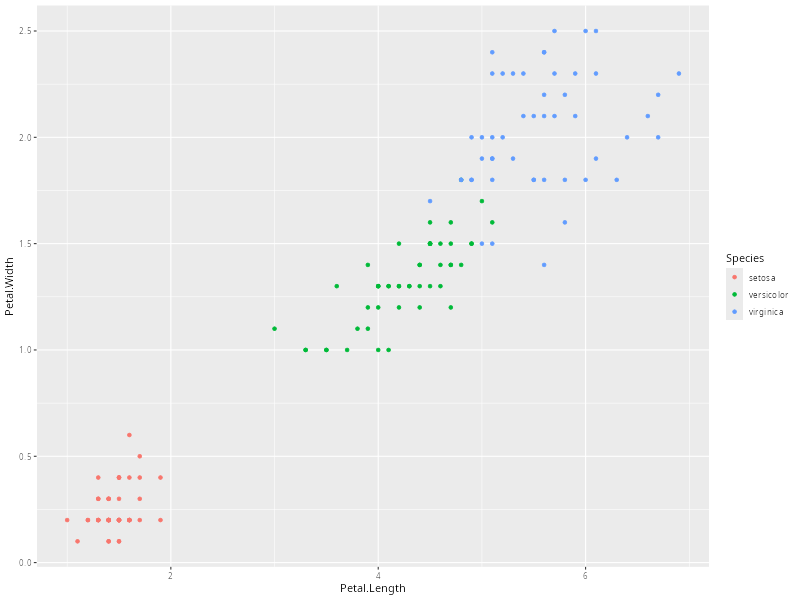

In [11]:
p <- ggplot(iris)

p <- p + aes(x = Petal.Length, y = Petal.Width, colour = Species)

p <- p + geom_point()

p

Una vez añadida una capa al gráfico, este puede pintarse (que es lo que ocurre al llamar a *p*).    
Se obtiene el mismo resultado haciendo, en una única línea:

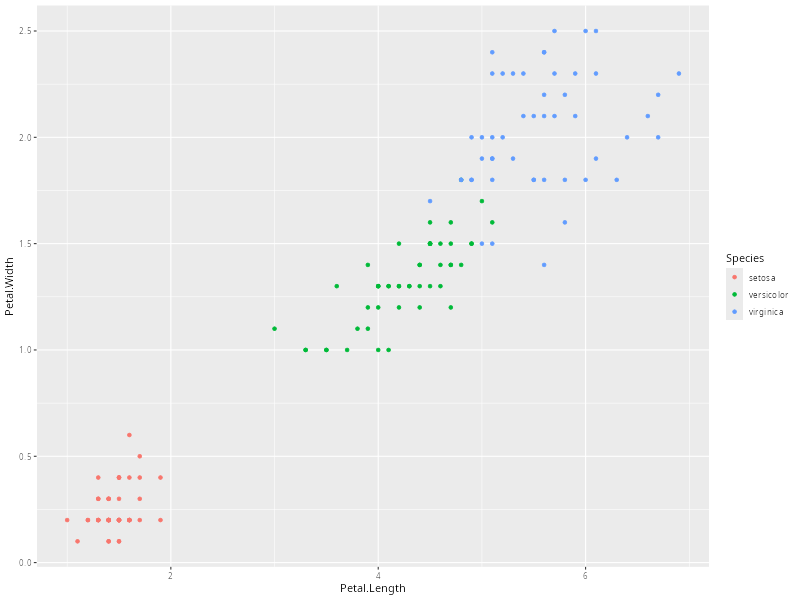

In [12]:
ggplot(iris, aes(x = Petal.Length, y = Petal.Width, colour = Species)) + geom_point()

Una característica de las *capas*, y de ahí su nombre, es que *pueden superponerse*.    

Por ejemplo:

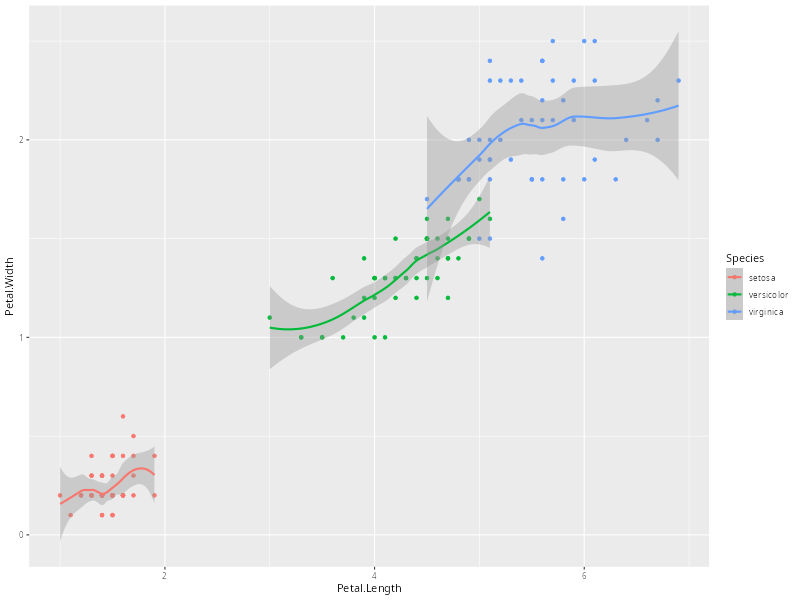

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'

In [13]:
ggplot(iris, aes(x = Petal.Length, y = Petal.Width, colour = Species)) +
  geom_point() + geom_smooth()

El código anterior añade al gráfico una curva suavizada (con sus intervalos de confianza en gris).

Existen muchos tipos de capas. Los más usuales son *geom_point*, *geom_line*, *geom_histogram*, *geom_bar* y *geom_boxplot*.    

Pero hay más. En la página http://docs.ggplot2.org/current/ se muestra una lista de los disponibles (en la versión más actualizada de ggplot2).   `En esa página se indica qué geom hay que utilizar en función de una representación esquemática del tipo de gráfico que se quiere construir. Además, hay capas específicas que exigen estéticas especiales. Para algunas tiene sentido, p.e., `shape`. Para otras no. Esas especificidades están indicadas en dicha página, que es más útil que la ayuda general de R.

Una vez creado un gráfico, es posible exportarlo a png, jpg, etc. La función `ggsave` guarda en un fichero el último gráfico generado con ggplot2. Lo hace, además, en el formato indicado en el nombre del fichero que se quiere generar. 

Por ejemplo, para guardar el gráfico anterior en un fichero png:

Saving 6.67 x 6.67 in image


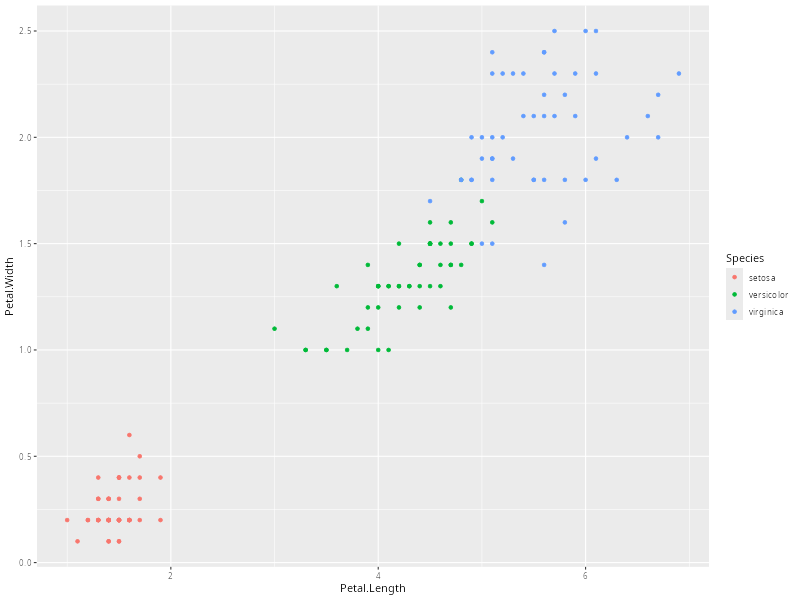

In [14]:
ggplot(iris, aes(x = Petal.Length, y = Petal.Width, colour = Species)) + geom_point()
ggsave("mi_grafico.png")

Con esto, se guarda la figura creada en la primera línea en formato png en el fichero `mi_grafico.png` del directorio de trabajo.

### Facetas   

Muchos de los gráficos que pueden generarse con los elementos anteriores pueden reproducirse sin mucho esfuerzo (exceptuando, tal vez, cuestiones de aspecto) usando los gráficos tradicionales de R, pero no los que usan facetas.

Las *facetas* implementan los gráficos de Trellis mencionados antes.    

Por ejemplo:

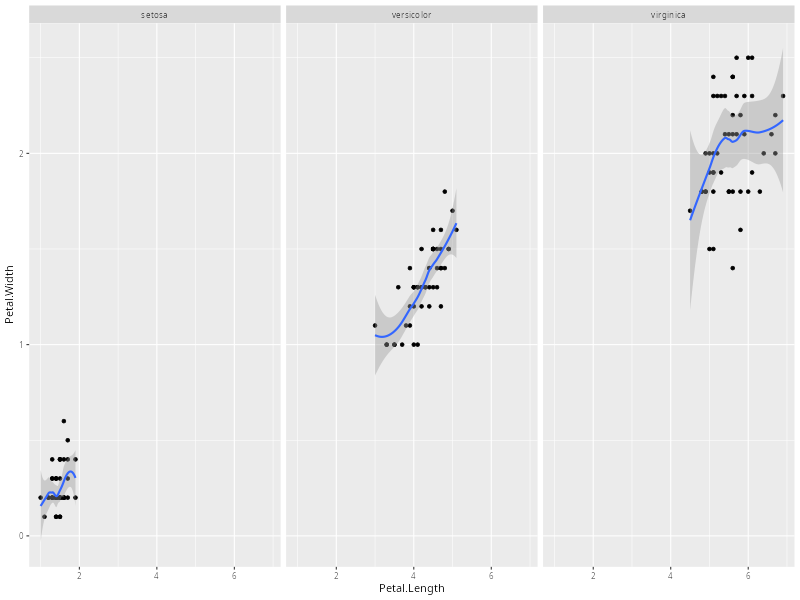

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'

In [15]:
ggplot(iris, aes(x = Petal.Length, y = Petal.Width)) +
  geom_point() + geom_smooth() +
  facet_grid(~ Species)

Se han generado tres gráficos dispuestos horizontalmente que comparan la relación entre la anchura y la longitud del pétalo de las tres especies de iris. Una característica de estos gráficos, que es crítica para poder hacer comparaciones adecuadas, es que comparten ejes.

Los gráficos podrían disponerse verticalmente reemplazando `facet_grid(~ Species)` por `facet_grid(Species ~ .)` en el código anterior.    

Además, se puede subdividir el lienzo por dos (o más) variables así:

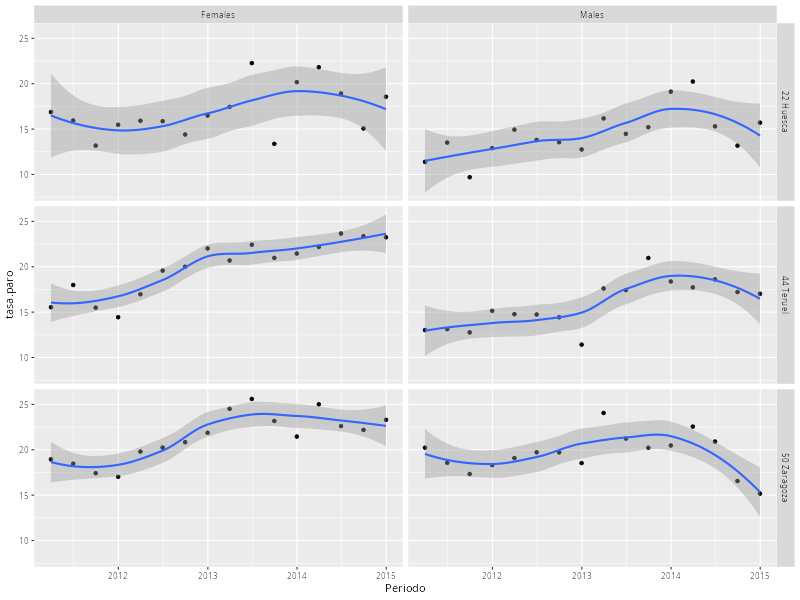

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'

In [16]:
tmp <- paro[paro$Provinces %in% c("50 Zaragoza", "22 Huesca", "44 Teruel"),]
ggplot(tmp, aes(x = Periodo, y = tasa.paro)) +
  geom_point() + geom_smooth() +
  facet_grid(Provinces~Gender)

En caso de haber muchas categorías (p.e., provincia, como se ha visto), puede usarse la función `facet_wrap` para distribuir las subgráficas en una cuadrícula.

### Más sobre estéticas   

Las estéticas se pueden etiquetar con la función `labs`. Además, se le puede añadir un título al gráfico usando la función `ggtitle`. Por ejemplo, en el gráfico anterior se pueden reetiquetar los ejes y la leyenda de la siguiente forma:

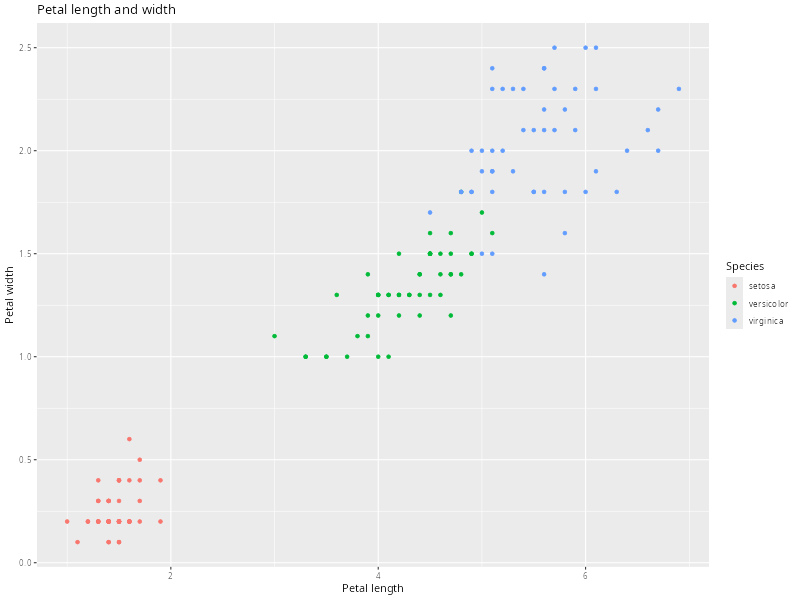

In [18]:
p <- p + ggtitle("Petal length and width") +
         labs(x = "Petal length",
              y = "Petal width",
              colour = "Species")

p

### Temas   

Los temas de ggplot2 permiten modificar aspectos estéticos del gráfico que no tienen que ver con los datos en sí. Eso incluye los ejes, etiquetas, colores de fondo, el tamaño de los márgenes, etc.    

No es habitual (y se desaconseja a los usuarios menos expertos) tener que alterar los temas que ggplot2 usa por defecto. Solo se vuelve necesario cuando los gráficos tienen que adecuarse a una imagen corporativa o atenerse a algún criterio de publicación exigente.

Un tema es una colección de elementos (p.e., panel.background, que indica el color, transparencia, etc. del lienzo sobre el que se representa el gráfico) modificables. El tema que usa ggplot2 por defecto es `theme_grey`. Al escribir `theme_grey()` en la consola de R, se muestran alrededor de cuarenta elementos modificables y sus atributos tal y como los define dicho tema.

#### ¿Qué se puede hacer con los temas?      

Una primera opción es elegir otro. Por ejemplo, se puede reemplazar el habitual por otros disponibles en el paquete como theme_bw (o theme_classic) haciendo:

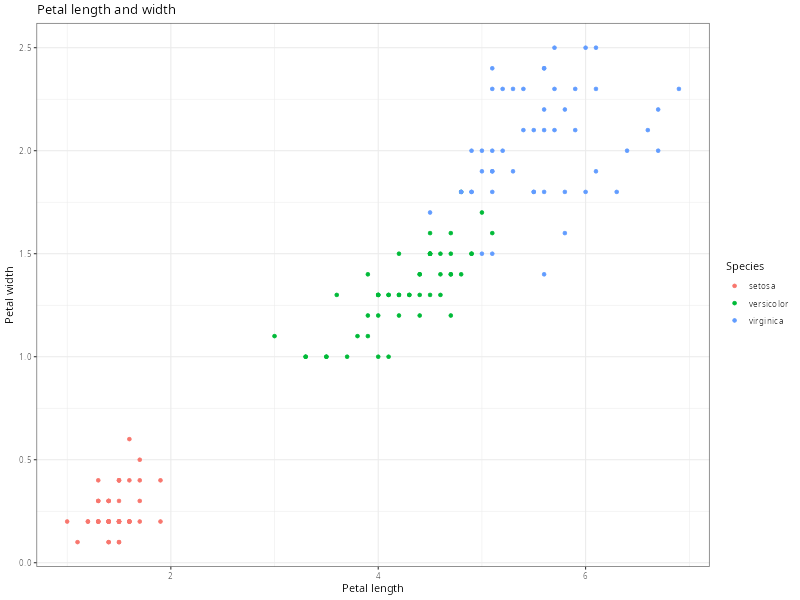

In [19]:
p <- p + theme_bw()
p

Es posible usar tanto los temas que incluye ggplot2 por defecto como otros creados por la comunidad.    
Algunos, por ejemplo, tratan de imitar el estilo de publicaciones reconocidas como The Economist o similares. Otros están recogidos en paquetes como, por ejemplo, `ggthemes`.

Alternativamente (o adicionalmente), es posible modificar un tema dado en un gráfico. Por ejemplo, haciendo:

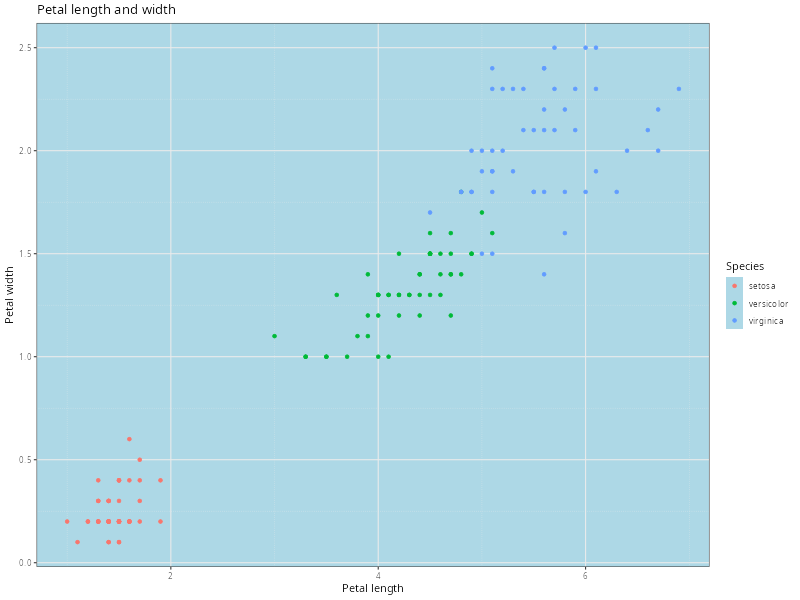

In [20]:
p <- p +
  theme_bw() +
  theme(
    panel.background = element_rect(fill = "lightblue"),
    panel.grid.minor = element_line(linetype = "dotted")
  )
p

Con el código anterior se está modificando el atributo de *color del lienzo* de un gráfico y el *tipo de la línea* con que se dibuja la malla.


## Tipos de gráficas   

### Diagramas de cajas y de violín   

Los diagramas de cajas (boxplots) y de violín (violin plots) son útiles para comparar distribuciones de una variable numérica en función de los niveles de una variable categórica.

Using Species as id variables


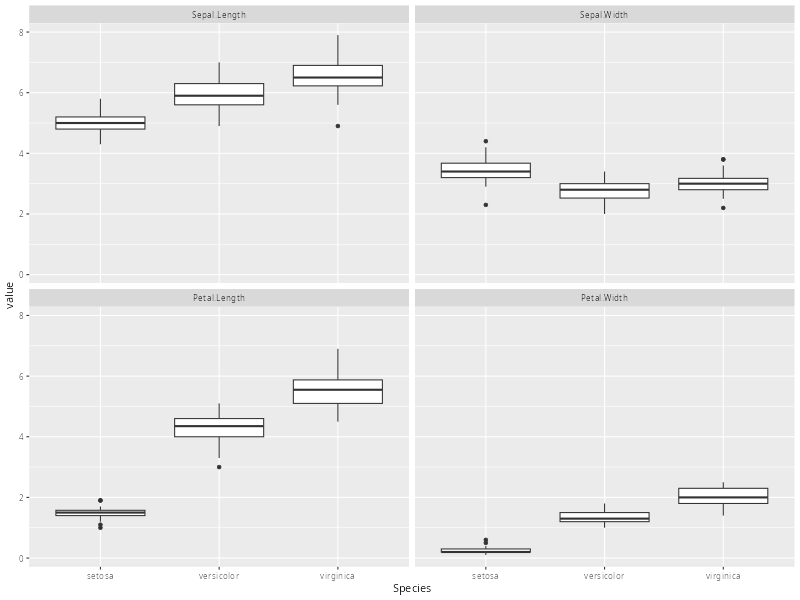

In [3]:
library(reshape2)
tmp <- melt(iris)
ggplot(tmp, aes(x = Species, y = value)) + geom_boxplot() + facet_wrap(~ variable)

El gráfico anterior utiliza las facetas para crear cuatro paneles, uno por variable.     

Así se resume rápidamente la información contenida en el conjunto de datos y revela eficazmente los patrones que encierra: por ejemplo, cómo la especie setosa tiene el pétalo sensiblemente más estrecho y corto que las otras dos.     

Este tipo de gráficos son fundamentales como herramienta exploratoria previa a la aplicación de técnicas de análisis estadístico.    

Los gráficos de cajas son muy básicos: apenas muestran cinco puntos característicos de una distribución: la mediana, los extremos y los cuartiles.     

Una versión moderna de los gráficos de cajas es la de gráficos de violín. Como los de cajas, resumen la distribución de las variables. Pero en lugar de una representación sucinta, tratan de dibujar la distribución real de los datos: son verdaderos gráficos de densidad, solo que dispuestos de otra manera para facilitar la comparación.

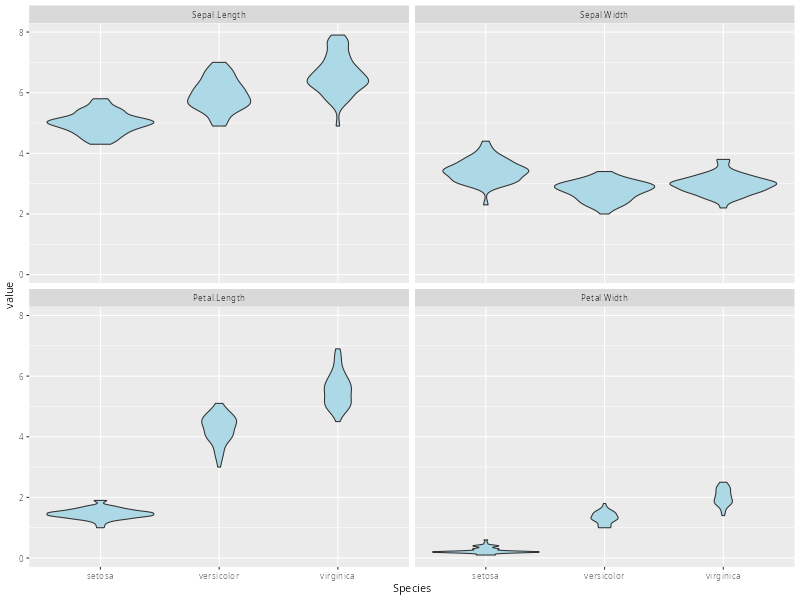

In [4]:
ggplot(tmp, aes(x = Species, y = value)) +
  geom_violin(fill = "lightblue") +
  facet_wrap(~ variable)

### Comparación de dos densidades    

El análisis de datos exige en ocasiones comparar dos distribuciones continuas. Se pueden usar gráficos de cajas o de violín, como arriba, pero también se puede dibujar la distribuición completa como en el siguiente gráfico:

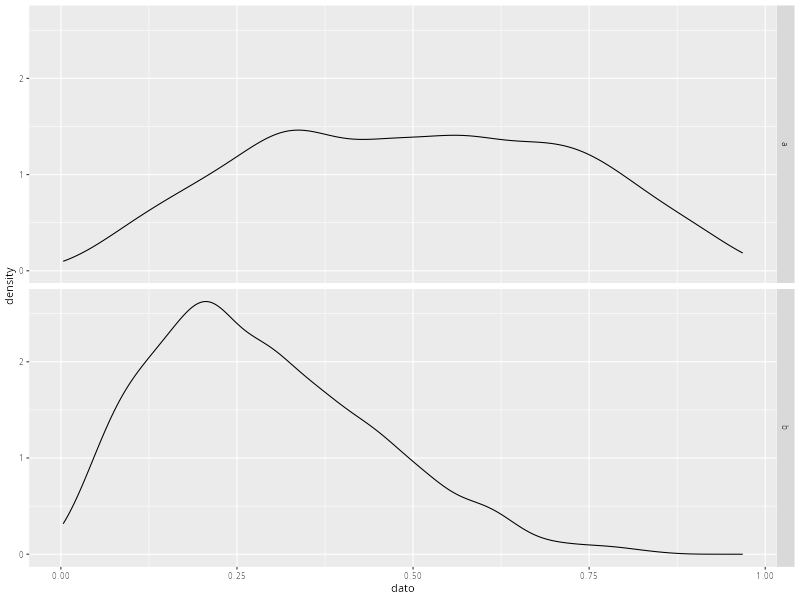

In [5]:
# datos (simulados)
a <- rbeta(1000, 2, 2)
b <- rbeta(2000, 2, 5)

# construcción de un dataframe a partir de ellos
tmp <- rbind(data.frame(origen = "a", dato = a),
             data.frame(origen = "b", dato = b))

ggplot(tmp, aes(x = dato)) + geom_density() + facet_grid(origen ~ .)

Alternativamente, se pueden solapar ambas distribuciones.    

El uso del parámetro alpha, que controla la **transparencia**, es fundamental en este caso:

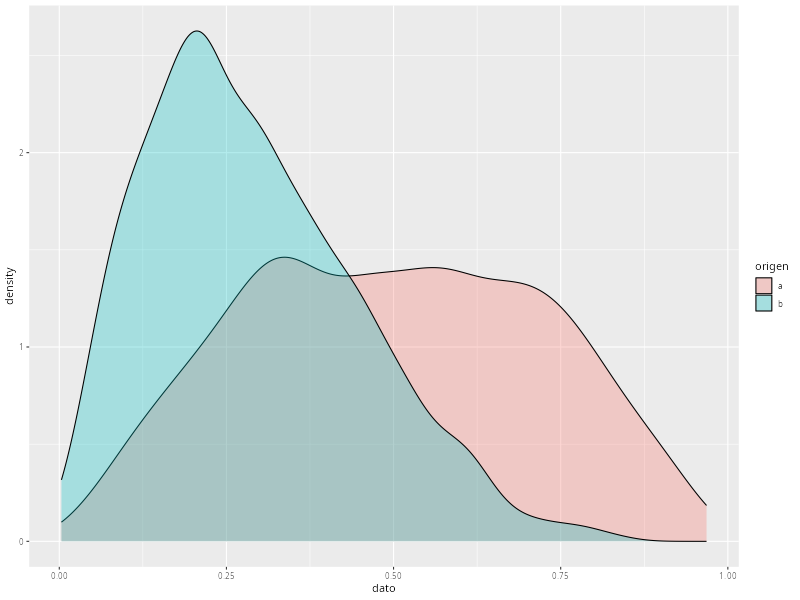

In [6]:
ggplot(tmp, aes(x = dato, fill = origen)) + geom_density(alpha = 0.3)

## Ejercicios adicionales    

- Ejercicio 1: Construye un diagrama de cajas de las temperaturas en NY (obtenida del dataset de R denominado 'airquality`) por mes (sin facetas). Nota: ten en cuenta que ggplot se confunde cuando la estética x del histograma no es categórica; por lo tanto, tendrás que convertir la variable mes en categórica (usando factor).

- Ejercicio 2: Construye un histograma de las temperaturas en NY por mes (con facetas).

- Ejercicio 3: Prueba con los gráficos de violín (que son una mezcla de los dos anteriores).

- Ejercicio 4: Superpón las distribuciones de las temperaturas de NY por mes como en el ejemplo anterior de la superposición de dos densidades (o como [aquí](https://www.datanalytics.com/2015/07/09/son-normales-las-alturas-de-los-individuos/)).

- Ejercicio 8.5 Haz gráficos con otros datasets (al menos busca dos datasets distintos).